# Optimum Numbers of Clusters
***By: Nishant Tiwari*** 

### Problem Statement 
Predict the Optimum number of clusters in the Iris Dataset.

### Clustering
Clustering is the process of of dividing datasets into groups, consisting of similar data-points.

Model Used: ***K-Means Clustering***

In [100]:
# importing the libraries

# data manupulation
import pandas as pd
import numpy as np

# ploting the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# importing model
from sklearn.cluster import KMeans 
import sklearn.metrics as metrics

In [101]:
# importing from in-built data library
from sklearn import datasets as ds

Iris = ds.load_iris()
iris_df = pd.DataFrame(Iris.data, columns = Iris.feature_names)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [102]:
# rading the data
iris=pd.read_csv('DataSet\Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


If you know the ***Problem statement*** you understand that in above data set the id column in useless so we ***drop Id column***.  

In [103]:
iris.drop(columns='Id', inplace=True)

# we again print the data set just to witness the changes
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Basic Information Collection

In [104]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [105]:
# checking for null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [106]:
# by seeing the data it seems like Species column have categorical value
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Exploratory Data Analysis

#### Ploting Data Set
 

Text(0.5, 0, 'SepalLengthCm')

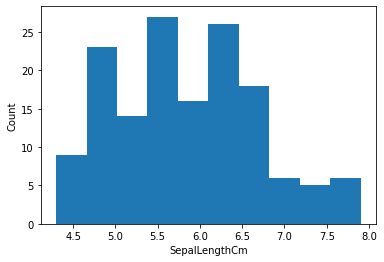

In [107]:
# ploting Sepal Length to Count
plt.hist(iris['SepalLengthCm'])
plt.ylabel('Count')
plt.xlabel('SepalLengthCm')

Text(0.5, 0, 'SepalWidthCm')

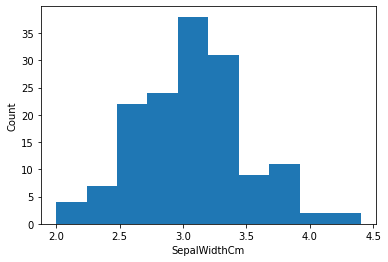

In [108]:
# ploting Sepal Width to Count
plt.hist(iris['SepalWidthCm'])
plt.ylabel('Count')
plt.xlabel('SepalWidthCm')

Text(0.5, 0, 'PetalLengthCm')

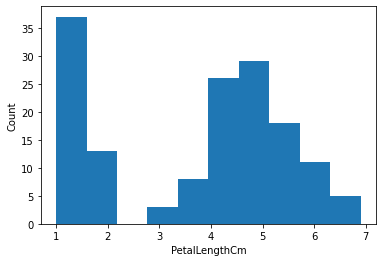

In [109]:
# ploting Petal Length to Count
plt.hist(iris['PetalLengthCm'])
plt.ylabel('Count')
plt.xlabel('PetalLengthCm')

Text(0.5, 0, 'PetalWidthCm')

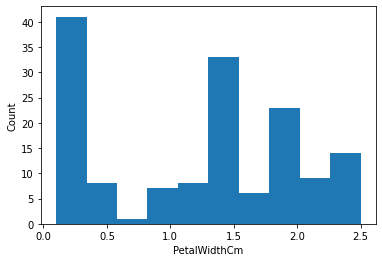

In [110]:
# ploting Petal Width to Count
plt.hist(iris['PetalWidthCm'])
plt.ylabel('Count')
plt.xlabel('PetalWidthCm')

Here the graph shows bell curve which shows a normal distribution, and dataset having normal distribution means it is easy to train the model, that is why data set with normal distribution is preffered while training the model.

Now we are going to plot each of the Classes(***i.e Iris-setosa, Iris-versicolor, Iris-virginica***) 

In [111]:
# color maping for classes
colors=['red','yellow', 'green']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

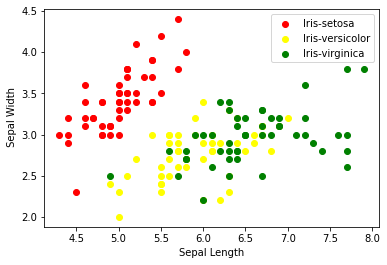

In [112]:
# ploting Sepal Length to Sepal Width for each respective classes
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel(" Sepal Width")
    plt.legend()

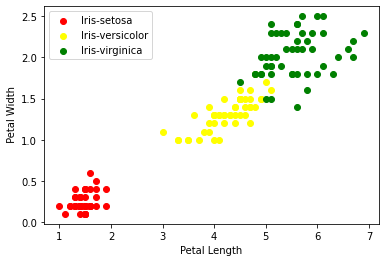

In [113]:
# ploting Petal Length and Petal Width for each respective classes
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel(" Petal Width")
    plt.legend()

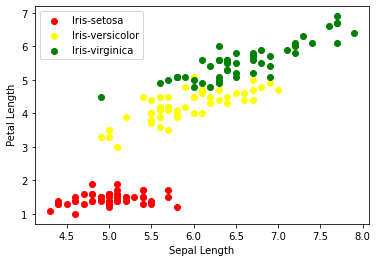

In [114]:
# ploting Sepal Length to Petal Length for each respective classes
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel(" Petal Length")
    plt.legend()

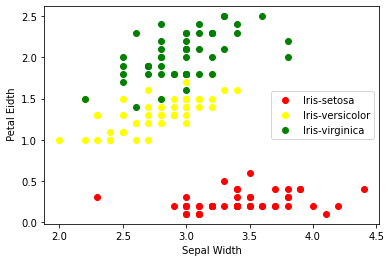

In [115]:
# ploting Sepal Width to Petal Width for each respective classes
for i in range(3):
    x=iris[iris['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i],label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel(" Petal Eidth")
    plt.legend()

#### Correlation Metrics
A Correlation Metrics is a table showing correlation coefficient between variables. Each cell in table shows the correlation between two variables. Its value ranges from ***-1 to +1*** .If two varible have high correlation, we can neglect any one of them. 

<AxesSubplot:>

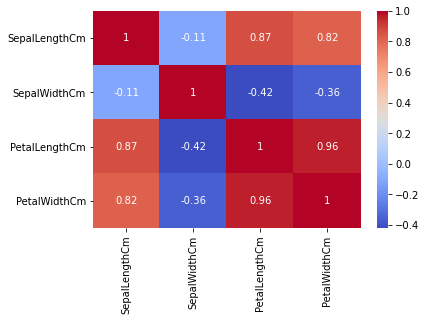

In [116]:
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')

## Calculating Optimum Number of Clusters

### Elbow Method

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (147) found smaller than n_clusters (148). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (147) found smaller than n_clusters (149). Possibly due to duplicate points in X.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (147) found smaller than n_clusters (150). Possibly due to duplicate points in X.
  """


Text(0, 0.5, 'Reduction in Variance')

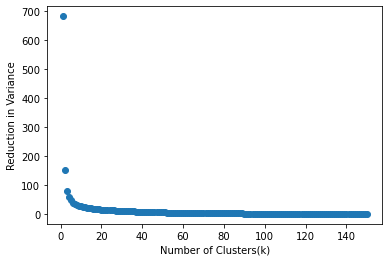

In [117]:
k=range(1,len(iris)+1)
wss=[]
for i in k:
    km=KMeans(n_clusters=i, init='k-means++')
    km=km.fit(iris.drop(columns='Species'))
    wss.append(km.inertia_)
plt.scatter(x=k, y=wss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Reduction in Variance')

If you see the graph there are lot points and elbow is forming somewhere in between 1-20, so we do this process again but the range of cluster reduces to 1-20.

Text(0, 0.5, 'Reduction in Variance')

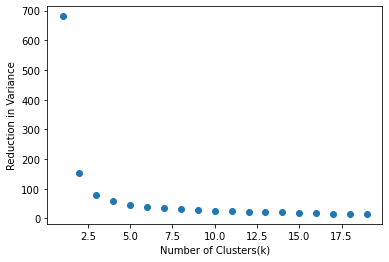

In [118]:
k=range(1,20)
wss=[]
for i in k:
    km=KMeans(n_clusters=i, init='k-means++')
    km=km.fit(iris.drop(columns='Species'))
    wss.append(km.inertia_)
plt.scatter(x=k, y=wss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Reduction in Variance')

If you see the graph there are lot points and elbow is forming somewhere in between 2.5-5.0, so we do this process again but the range of cluster reduces to 1-10.

Text(0, 0.5, 'Reduction in Variance')

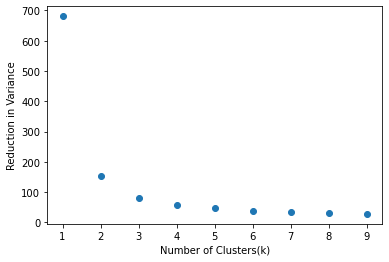

In [119]:
k=range(1,10)
wss=[]       # within cluster sum of squared
for i in k:
    km=KMeans(n_clusters=i, init='k-means++')
    km=km.fit(iris.drop(columns='Species'))
    wss.append(km.inertia_)
plt.scatter(x=k, y=wss)
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Reduction in Variance')

If you see the above graph, after the value of k reaches 3 there's no steep changes in reduction of variance, so this point is known as ***Elbow Point***.

### Silhouette Method

dict_items([(2, 0.6808136202936816), (3, 0.5525919445499757), (4, 0.4972279726640147), (5, 0.4885175508886279), (6, 0.3665040150235965), (7, 0.3602333693283137), (8, 0.3511429985989619), (9, 0.3323615530778525), (10, 0.31727672519832595)])


Text(0, 0.5, 'Silhouette Score')

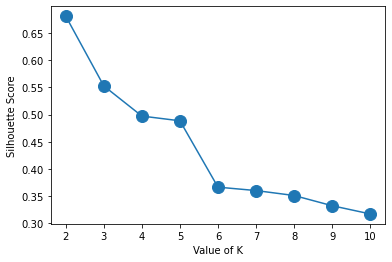

In [120]:
Silhouette={}
for i in range(2,11):
    km=KMeans(n_clusters=i, init='k-means++')
    km=km.fit(iris.drop(columns='Species'))
    labels=km.labels_
    Silhouette[i]=metrics.silhouette_score(iris.drop(columns='Species'), labels, metric='euclidean')
print(Silhouette.items())
plt.plot(Silhouette.keys(), Silhouette.values(),label='line', marker='o', markersize=12)
plt.xlabel('Value of K')
plt.ylabel('Silhouette Score')

We select the cluster which have highest Silhouette score, Here value of ***K = 2 gives the highest Silhouette score***.

***Now using two methods we got two different values of clusters we'll flot for both***

## Making clusters using KMeans algorithm
### K=3

In [126]:
z = iris.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans=K=kmeans.fit_predict(z)

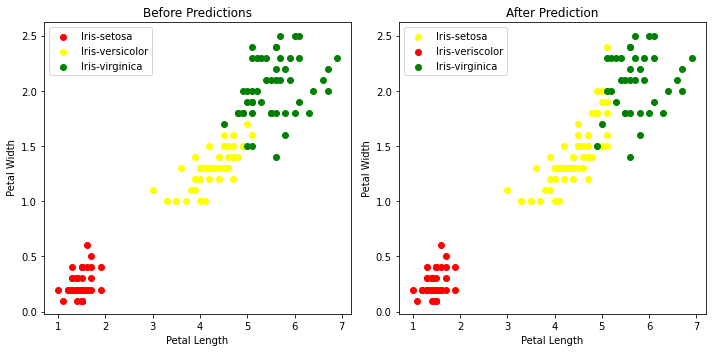

In [134]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i in range(3):
    x=iris[iris['Species']==species[i]]
    axes[0].scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i],label=species[i])
    axes[0].set_title('Before Predictions')
    axes[0].set_xlabel("Petal Length")
    axes[0].set_ylabel(" Petal Width")
    axes[0].legend()

axes[1].scatter(z[y_kmeans == 0, 2], z[y_kmeans == 0, 3], c = 'Yellow', label='Iris-setosa')
axes[1].scatter(z[y_kmeans == 1, 2], z[y_kmeans == 1, 3], c = 'red', label='Iris-veriscolor')
axes[1].scatter(z[y_kmeans == 2, 2], z[y_kmeans == 2, 3], c= 'green', label='Iris-virginica')
axes[1].set_title('After Prediction')
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')
axes[1].legend()


plt.tight_layout()

In [135]:
pd.crosstab(iris['Species'], y_kmeans)

col_0,0,1,2
Species,,,
Iris-setosa,0,50,0
Iris-versicolor,48,0,2
Iris-virginica,14,0,36


### k=2

In [136]:
kmeans_2 = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans=K=kmeans_2.fit_predict(z)

Text(0, 0.5, 'Petal Width')

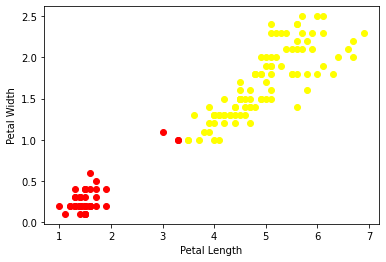

In [139]:
plt.scatter(z[y_kmeans == 0, 2], z[y_kmeans == 0, 3], c = 'Yellow')
plt.scatter(z[y_kmeans == 1, 2], z[y_kmeans == 1, 3], c = 'red')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')